In [4]:
!kaggle datasets download -d harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

Dataset URL: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows
License(s): CC0-1.0
  0% 0.00/175k [00:00<?, ?B/s]
100% 175k/175k [00:00<00:00, 50.5MB/s]


In [5]:
!unzip imdb-dataset-of-top-1000-movies-and-tv-shows.zip


Archive:  imdb-dataset-of-top-1000-movies-and-tv-shows.zip
  inflating: imdb_top_1000.csv       


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [8]:
df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [9]:
df.dropna(subset=['Certificate','Meta_score'], inplace=True)

#Getting gross values to ints
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
df['Gross'].fillna(df['Gross'].mean(), inplace=True)
df['Gross'] = df['Gross'].astype(int)

In [10]:
df=df[df['Released_Year']!='PG']

In [11]:
#Convert year to datetime
df['Released_Year']=pd.to_datetime(df['Released_Year'],format='%Y')


<ipython-input-11-e1010b0080d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Released_Year']=pd.to_datetime(df['Released_Year'],format='%Y')


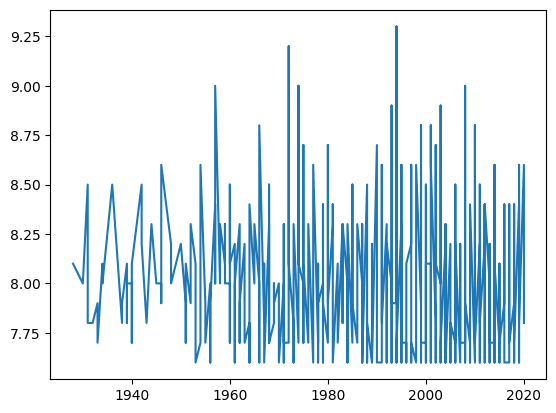

In [12]:
ordered_df=df.sort_values(by='Released_Year')
plt.plot(ordered_df['Released_Year'],ordered_df['IMDB_Rating'])


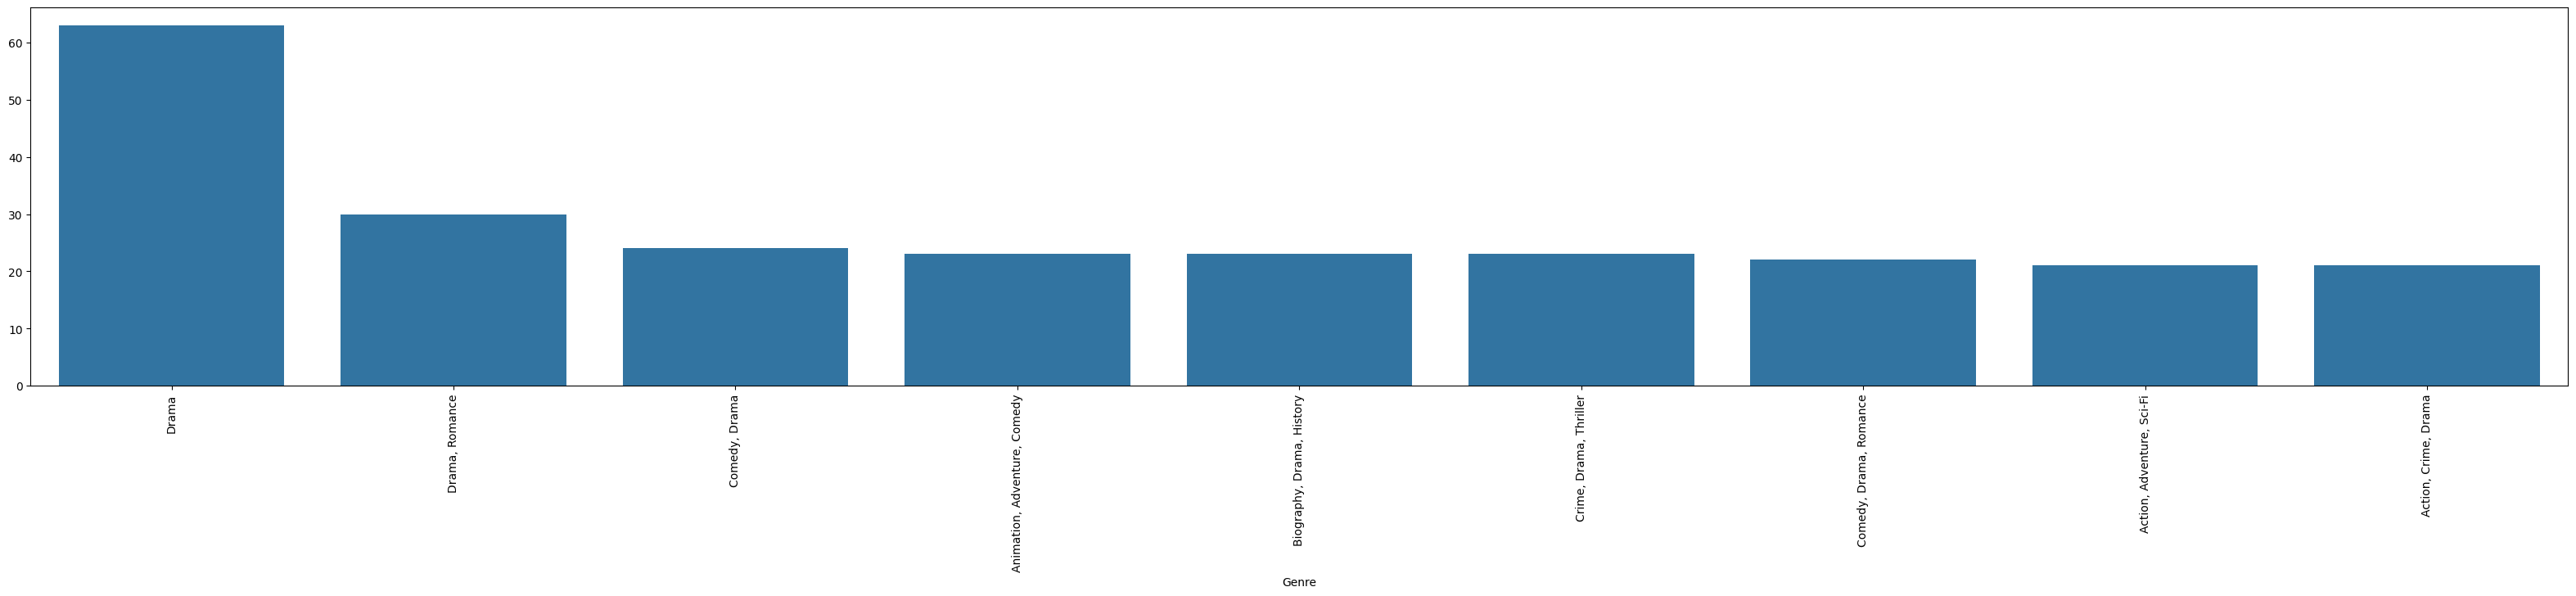

In [19]:
genre_count = df['Genre'].value_counts()
popular_genre = genre_count[genre_count>20]
plt.figure(figsize=(40, 6))
sns.barplot(x=popular_genre.index, y=popular_genre.values)
plt.xticks(rotation=90)
plt.show()

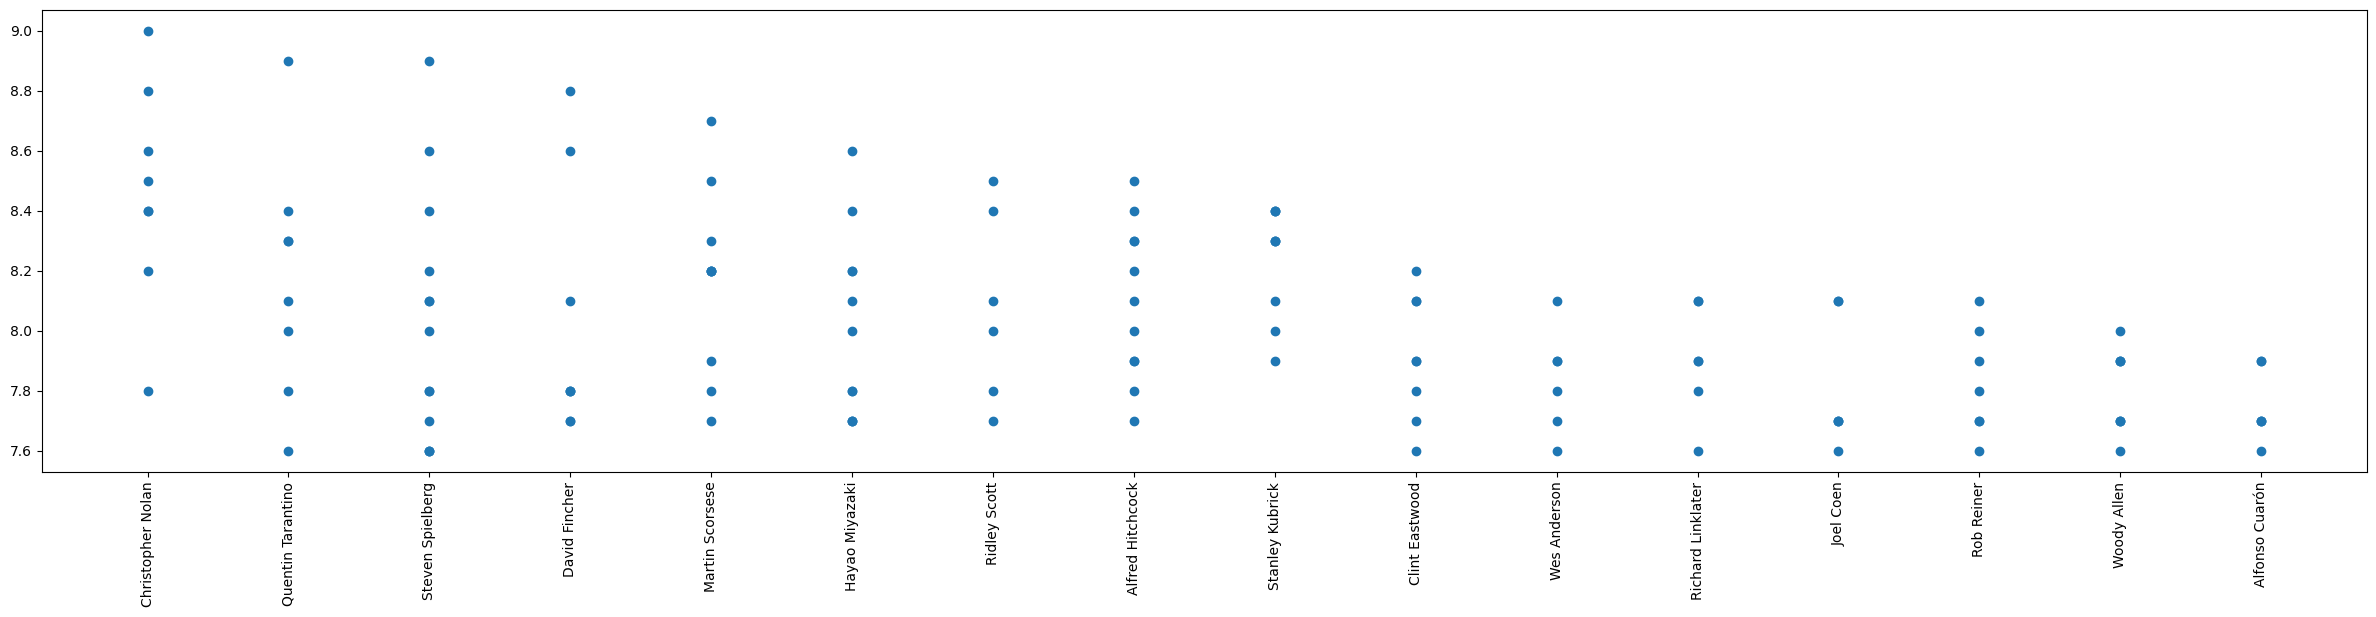

In [20]:
plt.figure(figsize=(30, 6))
directors = df['Director'].value_counts()
pop_directors = directors[directors>5]
movies_with_pop_directors = df[df['Director'].isin(pop_directors.index)]
plt.scatter(x=movies_with_pop_directors['Director'], y=movies_with_pop_directors['IMDB_Rating'])
plt.xticks(rotation=90)
plt.show()




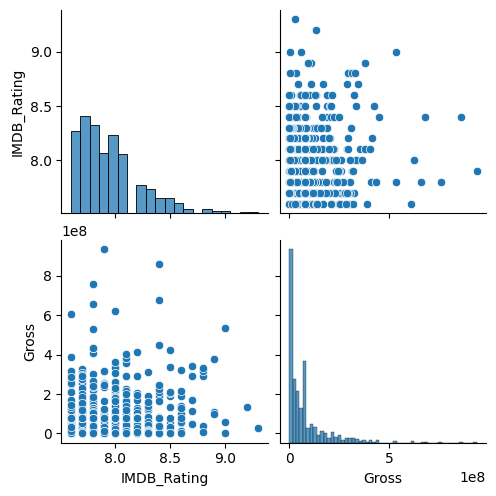

In [15]:
sns.pairplot(df[['Star1','Star2','Star3','IMDB_Rating','Gross']])


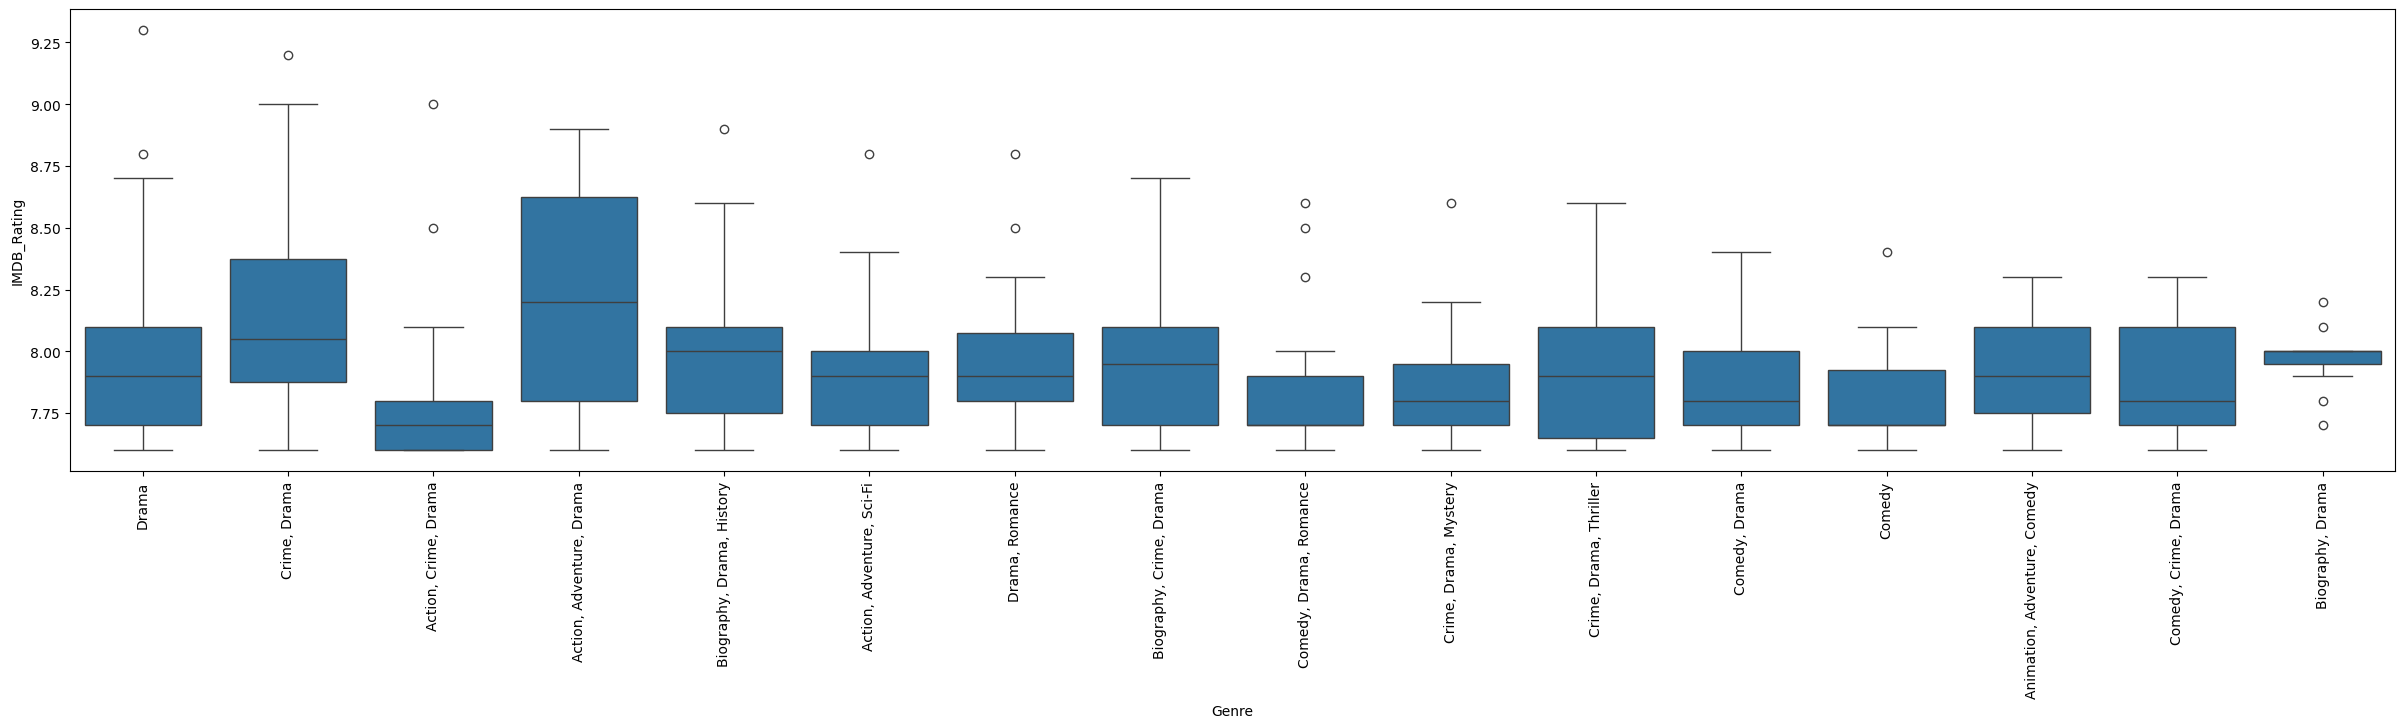

In [16]:
popular_genres=df['Genre'].value_counts()>10
#I am struggling to understand this syntax without using AI
df_popular_genres = df[df['Genre'].isin(popular_genres[popular_genres].index)]
plt.figure(figsize=(30, 6))
sns.boxplot(x=df_popular_genres['Genre'],y=df_popular_genres['IMDB_Rating'])
plt.xticks(rotation=90)
plt.show()

<Axes: >

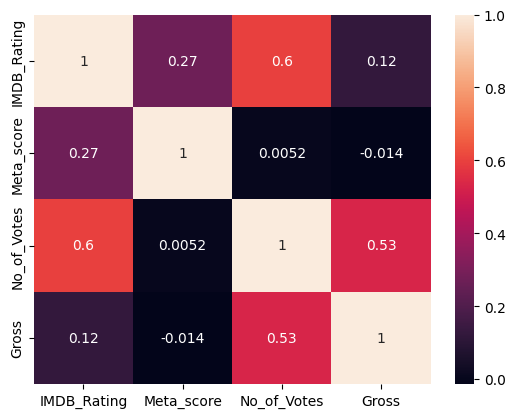

In [17]:
subset_df = df[['IMDB_Rating','Meta_score','No_of_Votes','Gross']]
corr_matrix = subset_df.corr()
sns.heatmap(corr_matrix,annot=True)
